Note: you may need to restart the kernel to use updated packages.


Accuracy :  73.33333333333333
     Temperature   Humidity  Real Values Predicted Values
0      25.519397  83.983517       grapes             rice
1      34.600825  63.112968    blackgram        blackgram
2      16.775573  82.752419       grapes           grapes
3      30.085454  69.348120    blackgram        blackgram
4      20.712193  19.836433     chickpea      kidneybeans
..           ...        ...          ...              ...
295    23.089749  63.104596        maize           lentil
296    19.522262  24.926072  kidneybeans      kidneybeans
297    16.362519  83.004716       grapes           grapes
298    21.666283  80.709606         rice             rice
299    28.003160  78.900860       banana           banana

[300 rows x 4 columns]


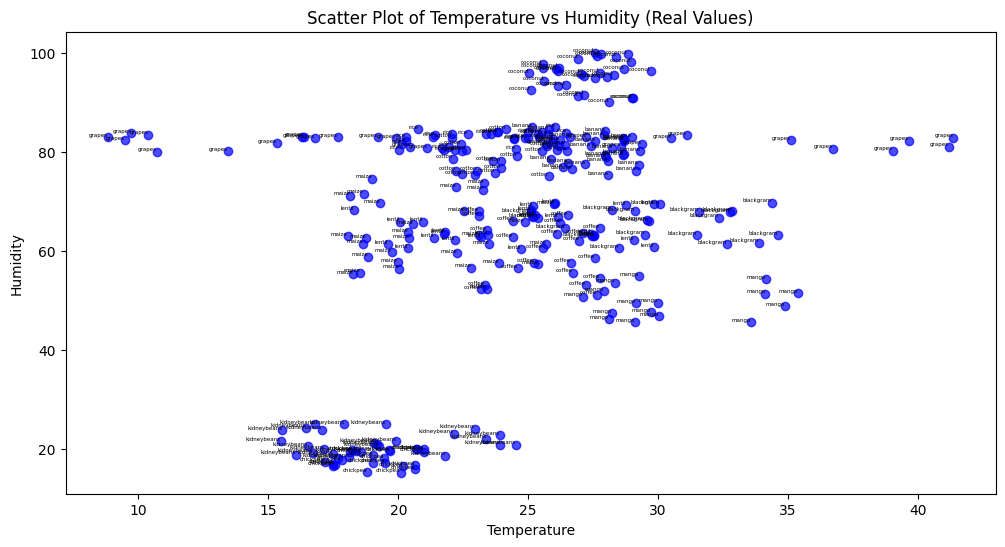

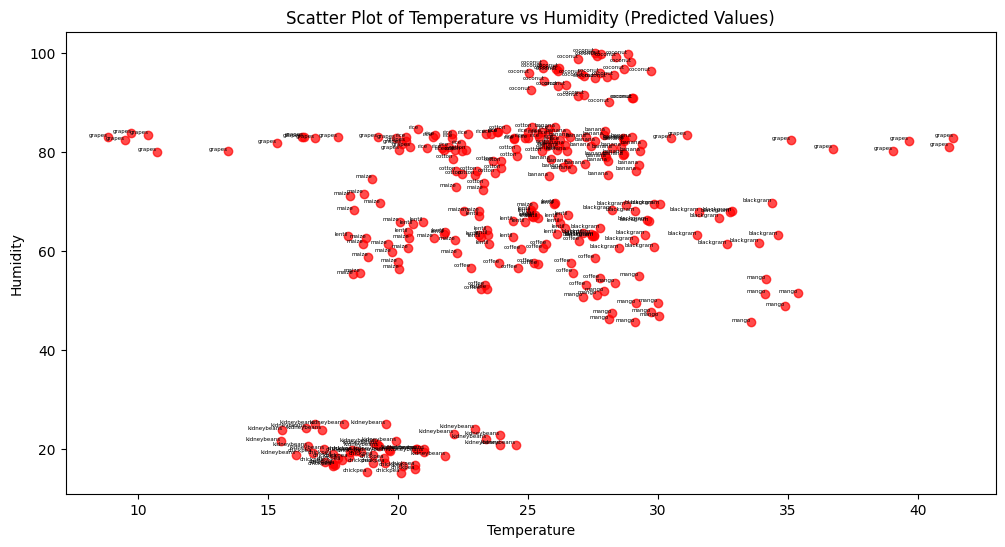

In [84]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Install seaborn
%pip install seaborn
import seaborn as sns

# Load dataset
dataset = pd.read_csv('Crop_recommendation.csv')
X = dataset.iloc[:, :2].values
y = dataset['label'].values
dataset

# Split dataset
from sklearn.model_selection import train_test_split
random_state_input = input("Enter a random state: ")
random_state = int(random_state_input)  # Assuming random_state is expected to be an integer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=random_state)

# Standardize the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Train the Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test_scaled)

# Calculate the confusion matrix to evaluate the performance of the classifier on the test set
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# print(cm)
# Calculate and print the accuracy of the Gaussian Naive Bayes classifier
from sklearn.metrics import accuracy_score 
print ("\n\nAccuracy : ", ((accuracy_score(y_test, y_pred)*100)))


# Create a DataFrame with original temperature, humidity, real, and predicted values
df = pd.DataFrame({'Temperature': X_test[:, 0], 'Humidity': X_test[:, 1], 'Real Values': y_test, 'Predicted Values': y_pred})
print(df)

# Create a scatter plot for Real Values with crop names
plt.figure(figsize=(12, 6))
for i, row in df.iterrows():
    plt.scatter(row['Temperature'], row['Humidity'], c='blue', alpha=0.7)
    plt.text(row['Temperature'], row['Humidity'], row['Real Values'], fontsize=4, ha='right', va='bottom')

plt.title('Scatter Plot of Temperature vs Humidity (Real Values)')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()

# Create a scatter plot for Predicted Values with crop names
plt.figure(figsize=(12, 6))
for i, row in df.iterrows():
    plt.scatter(row['Temperature'], row['Humidity'], c='red', alpha=0.7)
    plt.text(row['Temperature'], row['Humidity'], row['Predicted Values'], fontsize=4, ha='right', va='bottom')

plt.title('Scatter Plot of Temperature vs Humidity (Predicted Values)')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.show()